In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("website data-export (1).csv")

In [3]:
df.head(5)

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [4]:
# Remove unnamed from header and Set the first row as header
df.columns=df.iloc[0]                                       # Set first row as column names
df=df.drop(index=0).reset_index(drop=True)                  # Remove the first row and reset index
df.columns=["Channel group","Datehour","Users","Session","Engaged sessions","Average engagement time per session","Engagement session per user","Events per session","Engagement rate","Event count"]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Channel group                        3182 non-null   object
 1   Datehour                             3182 non-null   object
 2   Users                                3182 non-null   object
 3   Session                              3182 non-null   object
 4   Engaged sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engagement session per user          3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [6]:
# changing data type of some columns 
df["Datehour"]=pd.to_datetime(df["Datehour"],format="%Y%m%d%H",errors='coerce')            #converting datehour column data type

numeric_cols=df.columns.drop(["Channel group","Datehour"])                               # except these 2 columns
df[numeric_cols]=df[numeric_cols].apply(pd.to_numeric,errors='coerce')                   # converting all columns
df["Hours"]=df["Datehour"].dt.hour

In [7]:
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel group                        3182 non-null   object        
 1   Datehour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Session                              3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engagement session per user          3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hours       

,Channel group,Datehour,Users,Session,Engaged sessions,Average engagement time per session,Engagement session per user,Events per session,Engagement rate,Event count,Hours
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19


In [8]:
df.describe()

,Datehour,Users,Session,Engaged sessions,Average engagement time per session,Engagement session per user,Events per session,Engagement rate,Event count,Hours
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


In [9]:
df.isnull().sum()

Channel group                          0
Datehour                               0
Users                                  0
Session                                0
Engaged sessions                       0
Average engagement time per session    0
Engagement session per user            0
Events per session                     0
Engagement rate                        0
Event count                            0
Hours                                  0
dtype: int64

# Visualizations

In [11]:
sns.set(style="whitegrid")

<function matplotlib.pyplot.show(close=None, block=None)>

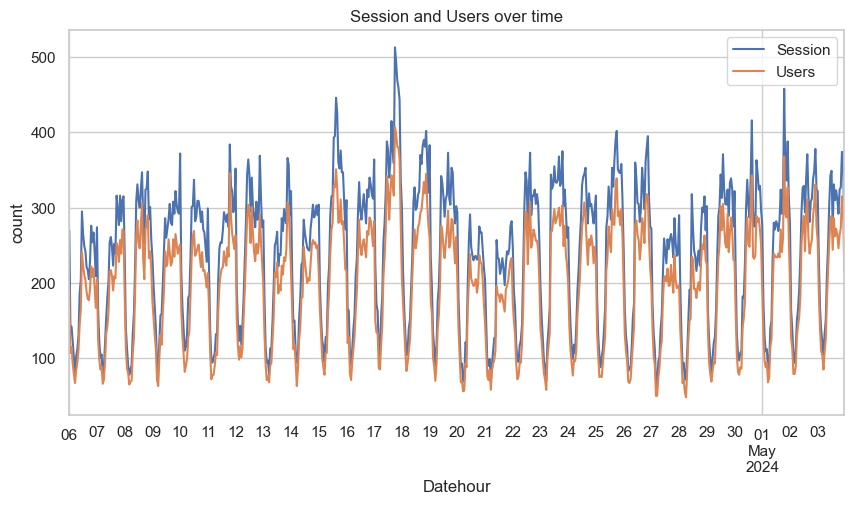

In [12]:
plt.figure(figsize=(10,5))
df.groupby("Datehour")[["Session","Users"]].sum().plot(ax=plt.gca())
plt.title("Session and Users over time")
plt.xlabel("Datehour")
plt.ylabel("count")
plt.show

# total users by channel

C:\Users\Admin\AppData\Local\Temp\ipykernel_8132\3999233837.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="Channel group",y="Users",estimator=np.sum,palette="viridis")


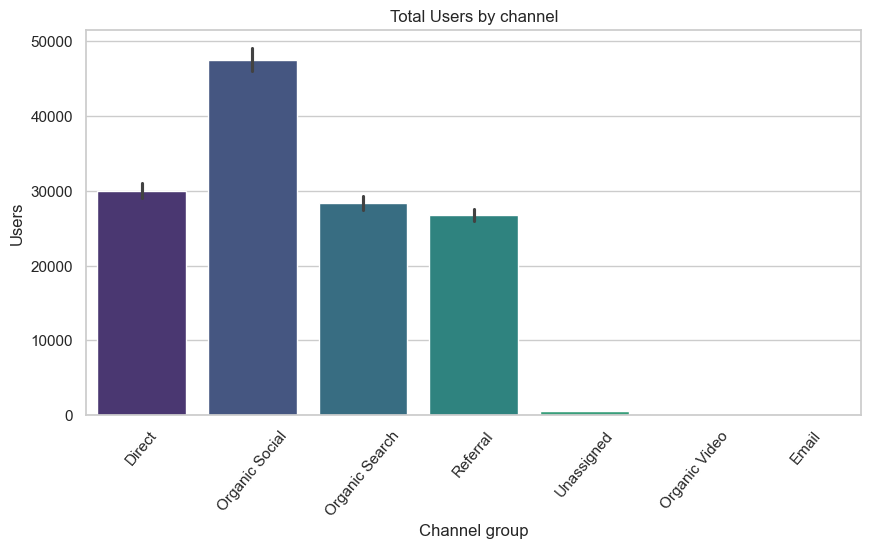

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x="Channel group",y="Users",estimator=np.sum,palette="viridis")
plt.title("Total Users by channel")
plt.xticks(rotation=50)
plt.show()

# Average engagement time by channel

C:\Users\Admin\AppData\Local\Temp\ipykernel_8132\4215509453.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="Channel group",y="Average engagement time per session",estimator=np.mean,palette="magma")


AttributeError: module 'matplotlib.pyplot' has no attribute 'shoe'

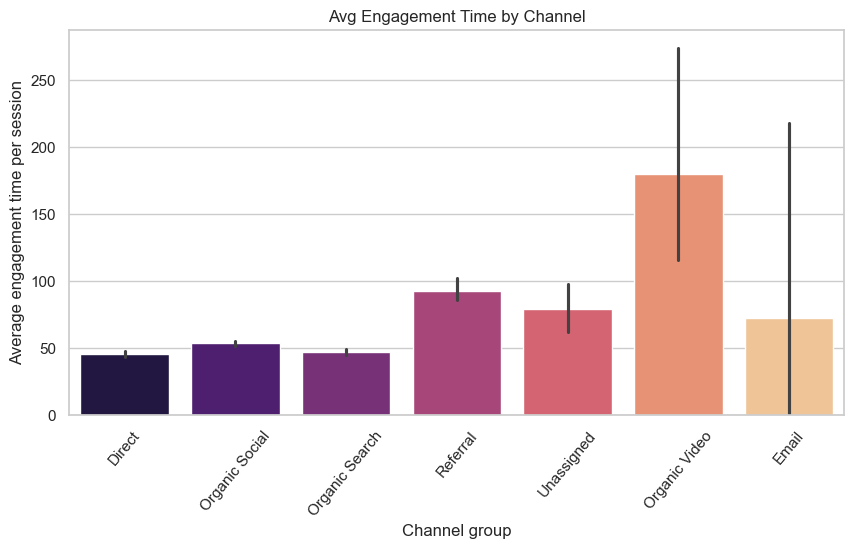

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x="Channel group",y="Average engagement time per session",estimator=np.mean,palette="magma")
plt.title("Avg Engagement Time by Channel")
plt.xticks(rotation=50)
plt.shoe()

# Engagement Rate Distribution by channel

C:\Users\Admin\AppData\Local\Temp\ipykernel_8132\4273458834.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="Channel group", y="Engagement rate", palette="coolwarm")


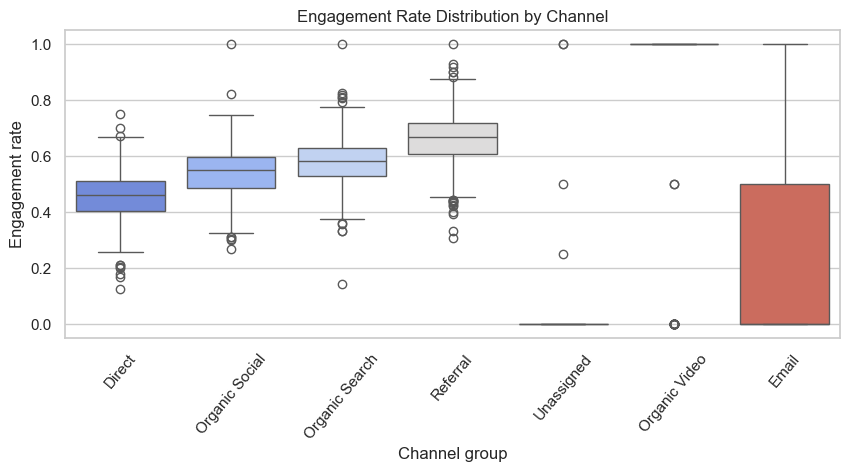

In [19]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df,x="Channel group", y="Engagement rate", palette="coolwarm")
plt.title("Engagement Rate Distribution by Channel")
plt.xticks(rotation=50)
plt.show()

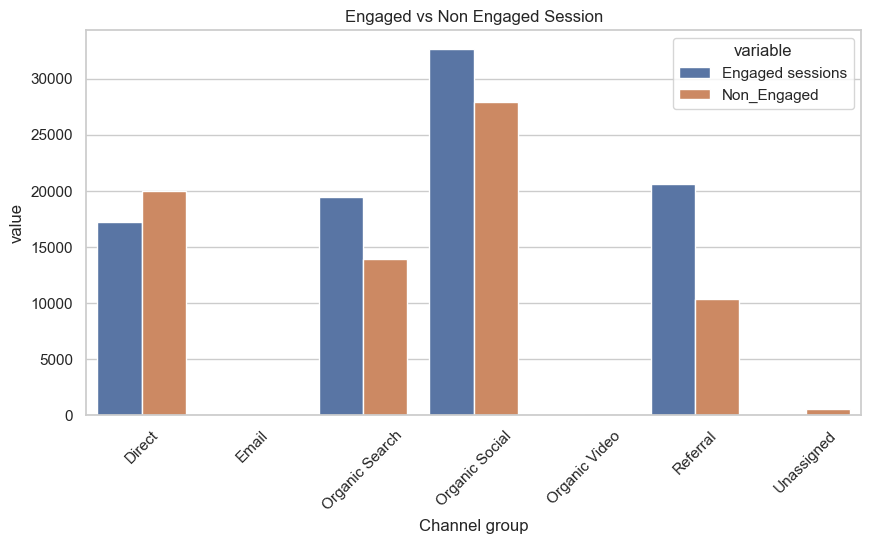

In [35]:
session_df= df.groupby("Channel group")[["Session","Engaged sessions"]].sum().reset_index()
session_df["Non_Engaged"]=session_df["Session"]-session_df["Engaged sessions"]
session_df_memlted=session_df.melt(id_vars="Channel group",value_vars=["Engaged sessions","Non_Engaged"])

plt.figure(figsize=(10,5))
sns.barplot(data=session_df_memlted,x="Channel group", y="value", hue= "variable")
plt.title("Engaged vs Non Engaged Session")
plt.xticks(rotation=45)
plt.show()

# Traffic by hour and channel

In [46]:
heatmap_data= df.groupby(["Hours","Channel group",])["Session"].sum().unstack().fillna(0)

plt.figure(figsize=(15,5))
sns.heatmap(heatmap_data,cmap="Y1GnBu",linewidths=.5,annot=True,fmt='.0f')
plt.title("Traffic by Hour and Channel")
plt.xlabel("Channel group")
plt.ylabel("Hour of Day")
plt.show()

KeyError: "'Y1GnBu' is not a known colormap name"

<Figure size 1500x500 with 0 Axes>